In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report,roc_auc_score, confusion_matrix, accuracy_score,recall_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler,robust_scale



In [2]:
df = pd.read_excel ("Downloads\Bank_Personal_Loan_Modelling.xlsx",sheet_name='Data')
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Data Analysis

In [4]:
# Number of rows and column in Dataframe
rows,columns=df.shape
print("Number of rows:",rows)
print("Number of columns:",columns)

Number of rows: 5000
Number of columns: 14


In [5]:
# Dtatypes in Dataframe
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [6]:
#Checking for null values if any
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
df.isnull().values.any()

False

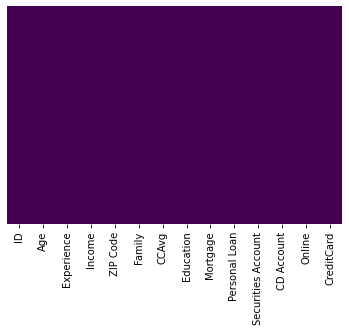

In [8]:
# Heatmap to show NaN value is present or not
sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='viridis')

In [9]:
# Number of unique values in dataset
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

# Exploratory Data Analysis

Univariate Data Analysis:-

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


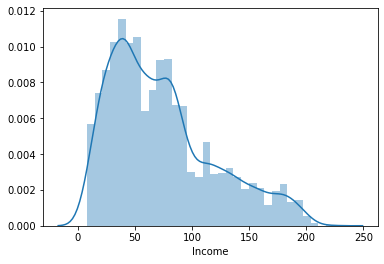

In [11]:
sns.distplot(df['Income'])

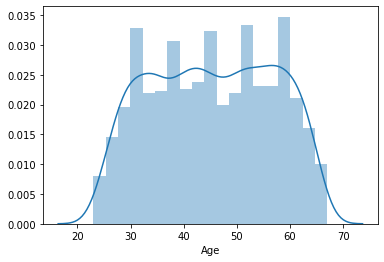

In [12]:
sns.distplot(df['Age'])

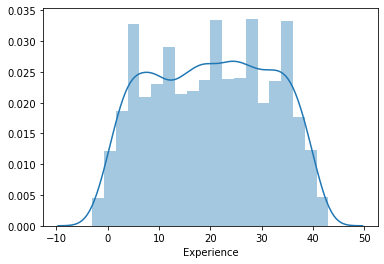

In [13]:
sns.distplot(df['Experience'])

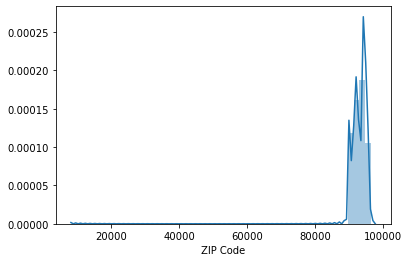

In [14]:
sns.distplot(df['ZIP Code'])

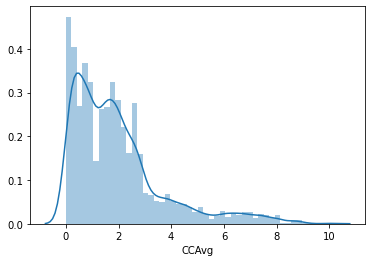

In [15]:
sns.distplot(df['CCAvg'])

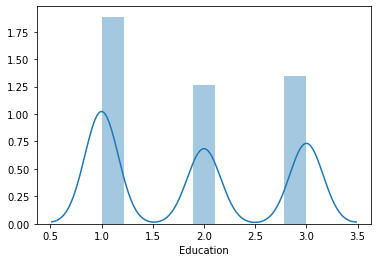

In [16]:
sns.distplot(df['Education'])

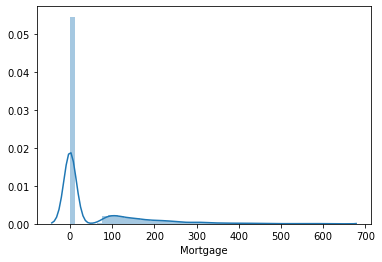

In [17]:
sns.distplot(df['Mortgage'])

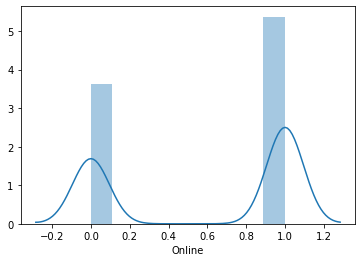

In [18]:
sns.distplot(df['Online'])

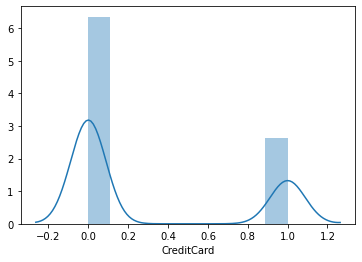

In [19]:
sns.distplot(df['CreditCard'])

Bi-Variate Data Analysis:-

In [20]:
df[['CreditCard', 'Personal Loan']].groupby(['CreditCard'], as_index=False).mean().sort_values(by='Personal Loan', ascending=False)

,CreditCard,Personal Loan
1,1,0.097279
0,0,0.095467


In [21]:
df[['Online', 'Personal Loan']].groupby(['Online'], as_index=False).mean().sort_values(by='Personal Loan', ascending=False)

,Online,Personal Loan
1,1,0.09752
0,0,0.09375


In [22]:
df[['Family', 'Personal Loan']].groupby(['Family'], as_index=False).mean().sort_values(by='Personal Loan', ascending=False)

,Family,Personal Loan
2,3,0.131683
3,4,0.109656
1,2,0.081790
0,1,0.072690


In [23]:
df[['Education', 'Personal Loan']].groupby(['Education'], as_index=False).mean().sort_values(by='Personal Loan', ascending=False)

,Education,Personal Loan
2,3,0.136576
1,2,0.129722
0,1,0.044370


In [24]:
df[['CD Account', 'Personal Loan']].groupby(['CD Account'], as_index=False).mean().sort_values(by='Personal Loan', ascending=False)

,CD Account,Personal Loan
1,1,0.463576
0,0,0.072371


In [25]:
df[['Securities Account', 'Personal Loan']].groupby(['Securities Account'], as_index=False).mean().sort_values(by='Personal Loan', ascending=False)

,Securities Account,Personal Loan
1,1,0.114943
0,0,0.093792


# Analyze by visualizing data

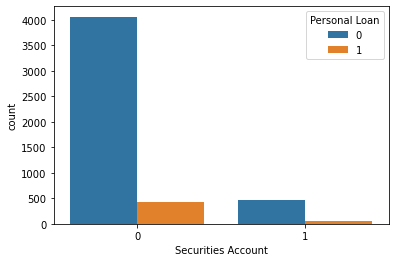

In [26]:
sns.countplot(x="Securities Account", data=df,hue="Personal Loan")

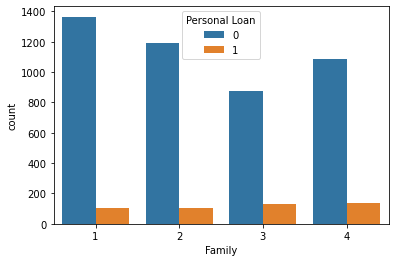

In [27]:
sns.countplot(x="Family", data=df,hue="Personal Loan")

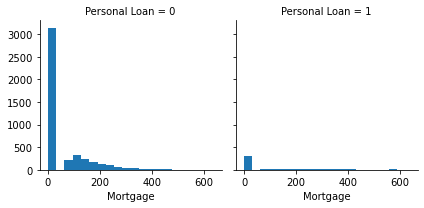

In [28]:
g = sns.FacetGrid(df, col='Personal Loan')
g.map(plt.hist,'Mortgage', bins=20)

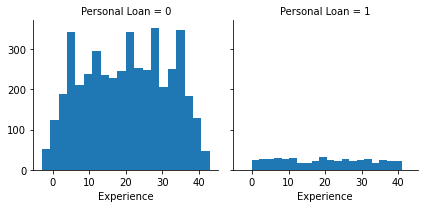

In [29]:
g = sns.FacetGrid(df, col='Personal Loan')
g.map(plt.hist,'Experience', bins=20)

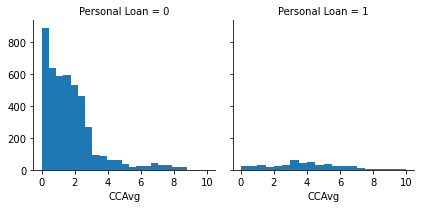

In [30]:
g = sns.FacetGrid(df, col='Personal Loan')
g.map(plt.hist,'CCAvg', bins=20)

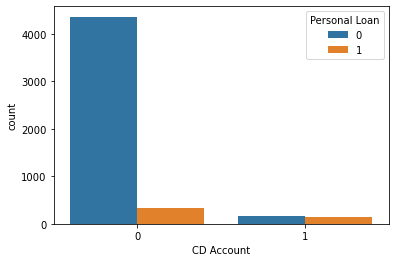

In [31]:
sns.countplot(x='CD Account',data=df,hue='Personal Loan')

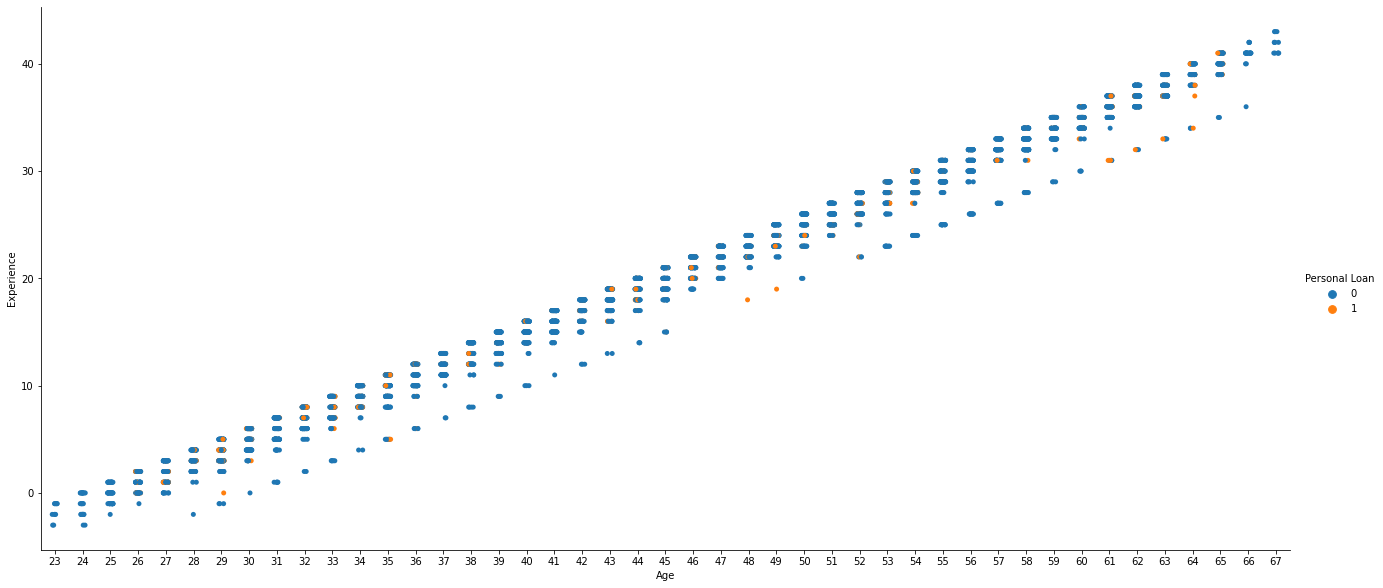

In [32]:
sns.catplot(x='Age', y='Experience', hue='Personal Loan', data = df, height=8.27, aspect=11/5)

c:\users\abhishek kumar\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


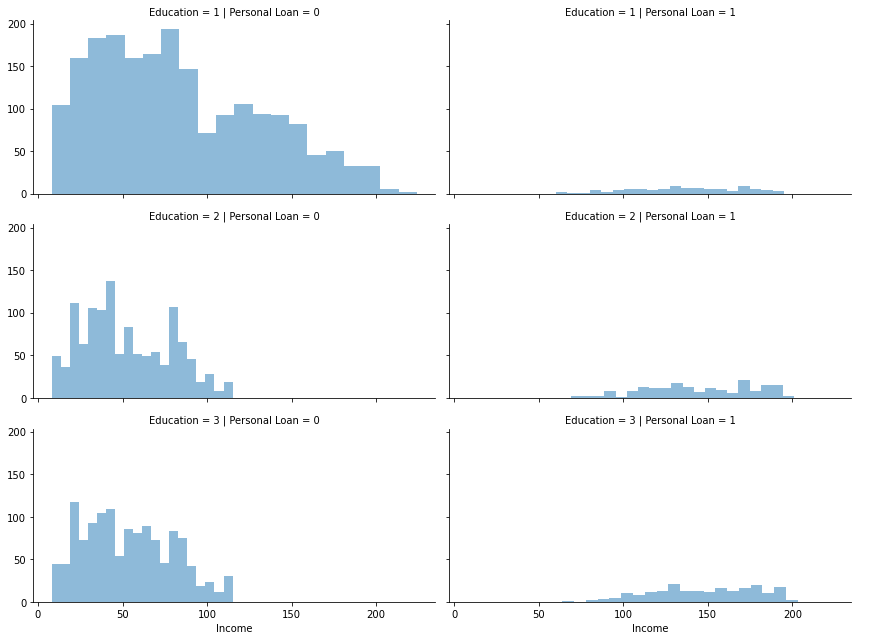

In [33]:
grid = sns.FacetGrid(df, col='Personal Loan', row='Education', size=3.0, aspect=2.0)
grid.map(plt.hist, 'Income', alpha=.5, bins=20)
grid.add_legend();


Observation:
    1. The customer having income less than 100K annual income and undergraduates , their loans has been rejected mostly.

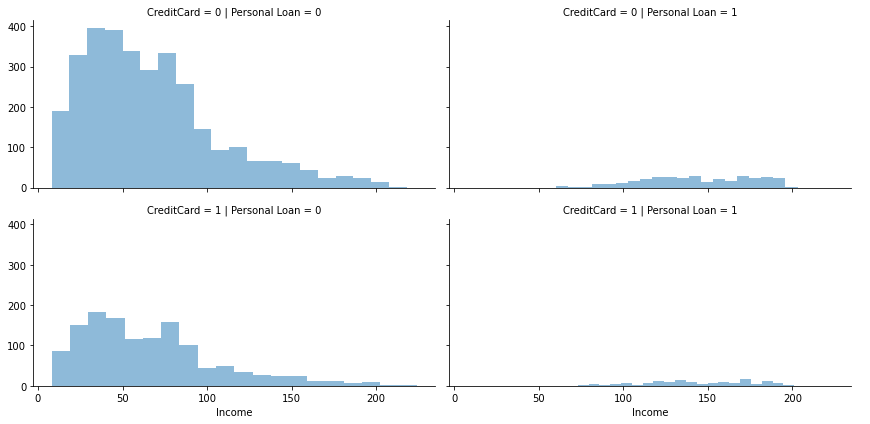

In [34]:
grid = sns.FacetGrid(df, col='Personal Loan', row='CreditCard', size=3.0, aspect=2.0)
grid.map(plt.hist, 'Income', alpha=.5, bins=20)
grid.add_legend();


Observation: 1.Customer Having high income anf those does not have credit card,the loan offer acceptance rate is high.Many customer of bank doesnt have the Credit card

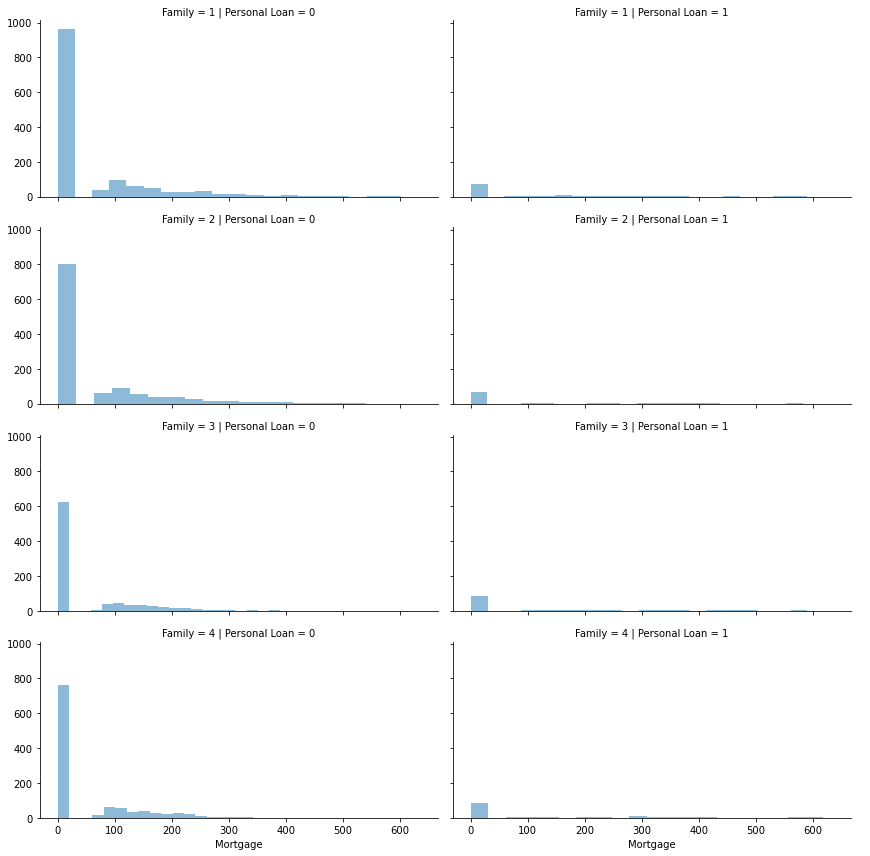

In [35]:
grid = sns.FacetGrid(df, col='Personal Loan', row='Family', size=3.0, aspect=2.0)
grid.map(plt.hist, 'Mortgage', alpha=.5, bins=20)
grid.add_legend();

Observation :-

1. Here in above diag. we observe that the person having personal loan has negligiable mortage but the person having having personal loan having the Mortage between 80k to 400k approx

# Data Cleaning:-

We observed some negative value in "Experience", so we need to remove the negative value for better result and accuracy.

In [36]:
pd.DataFrame(df[df["Experience"]>0][["Age","Education","Experience"]].sort_values("Age")).head()

,Age,Education,Experience
0,25,1,1
2836,25,1,1
2226,25,1,1
2192,25,1,1
3010,25,1,1


In [37]:
# Here we relace the negative value with an absolute value
df["Experience"] = df["Experience"].apply(abs)


In [38]:
df[df['Experience'] < 0]['Experience'].count()


0

Observation :-
    We have cleaned the data by replacing negative value with an absolute value



# Dimensionality Reduction:-

Here we are going to drop the ID and ZIP feature from the data set because it wont effect the final result.By droping these feature we can reduce our computational time and also it help in data compression.

In [39]:
df.head(3)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0


In [40]:
df = df.drop(['ID','ZIP Code'], axis=1)

In [41]:
df.head(3)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0


# Heat Map 


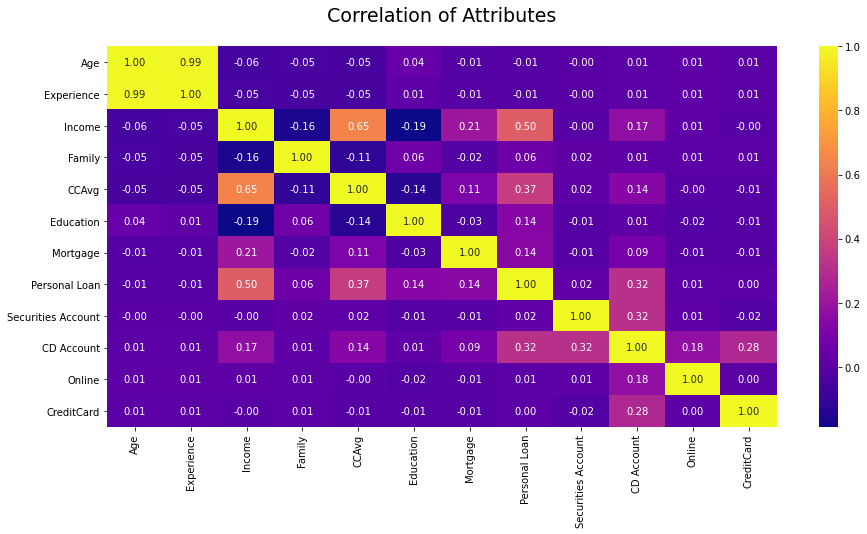

In [42]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(df.corr(), cmap='plasma',annot=True, fmt='.2f')

c:\users\abhishek kumar\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\users\abhishek kumar\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\users\abhishek kumar\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

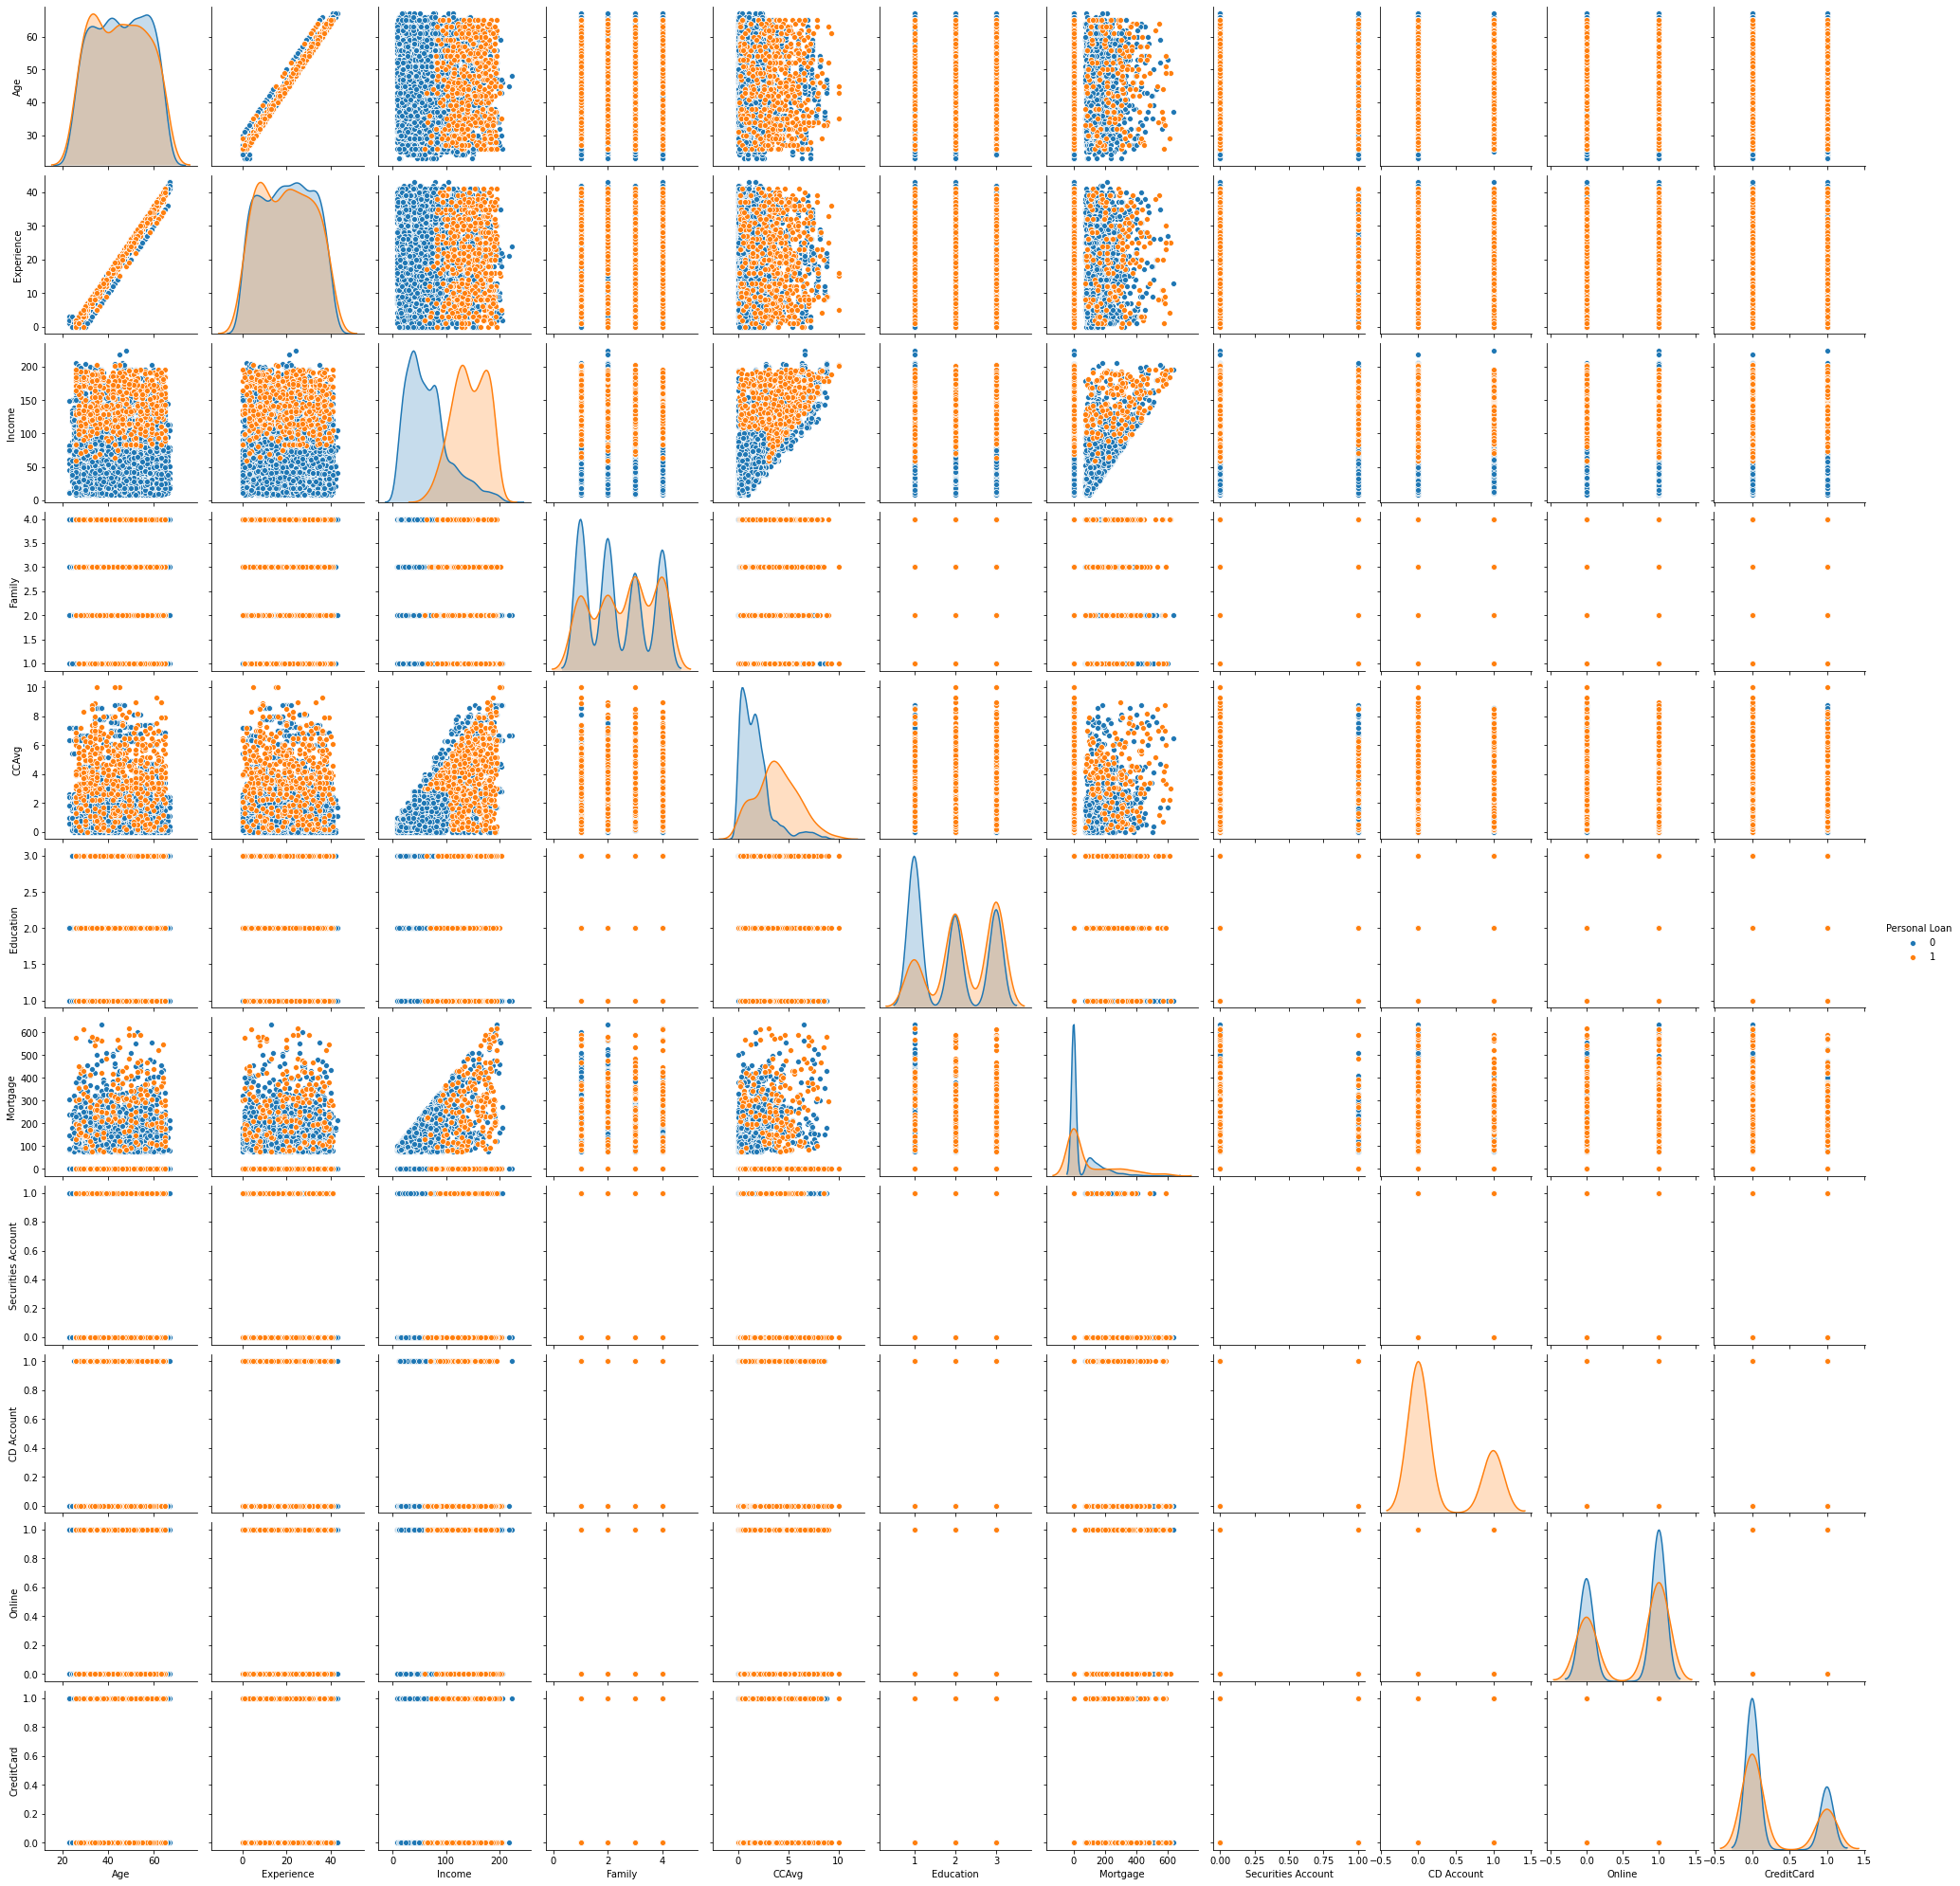

In [43]:
plt.figure(figsize=(20, 20))
sns.pairplot(df,hue="Personal Loan")

# Feature Scaling:-

In [44]:

scaler = StandardScaler();

colscal=['Age', 'Experience', 'Income', 'CCAvg']

scaler.fit(df[colscal])
scaled_df = pd.DataFrame(scaler.transform(df[colscal]),columns=colscal)

df =df.drop(colscal,axis=1)
df = scaled_df.join(df)

# Train_Test Data:-

In [45]:
X=df[['Age','Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Securities Account', 'CD Account', 'Online',
       'CreditCard']]
y=df["Personal Loan"]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)

# Applying ML Models

Logestic Regression:

In [47]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [48]:
predict = logmodel.predict(X_test.values)
predictProb = logmodel.predict_proba(X_test.values)
acc_log=round(metrics.accuracy_score(predict,y_test)*100,2)

In [49]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(logmodel, open(filename, 'wb'))

In [50]:

print('The accuracy of the Logistic is',metrics.accuracy_score(predict,y_test))
print(".."*40)
print("confusion_matrix :\n",confusion_matrix(y_test, predict))
print(".."*40)
print("\nclassification_report :\n",classification_report(y_test, predict))
print(".."*40)
print('Recall Score',recall_score(y_test, predict))
print('ROC AUC :', roc_auc_score(y_test, predictProb[:,1]))
print('Accuracy :',accuracy_score(y_test, predict))


The accuracy of the Logistic is 0.9506666666666667
................................................................................
confusion_matrix :
 [[1342   12]
 [  62   84]]
................................................................................

classification_report :
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1354
           1       0.88      0.58      0.69       146

    accuracy                           0.95      1500
   macro avg       0.92      0.78      0.83      1500
weighted avg       0.95      0.95      0.95      1500

................................................................................
Recall Score 0.5753424657534246
ROC AUC : 0.9581756743084923
Accuracy : 0.9506666666666667


Logistic Regration with KFold Cross Validation:

In [51]:
score1 =cross_val_score(X=X,y=y,estimator=logmodel,scoring="recall",cv=10)
score2 =cross_val_score(X=X,y=y,estimator=logmodel,scoring="roc_auc",cv=10)
score3 =cross_val_score(X=X,y=y,estimator=logmodel,scoring="accuracy",cv=10)
score4 =cross_val_score(X=X,y=y,estimator=logmodel,scoring="f1",cv=10)
score5 =cross_val_score(X=X,y=y,estimator=logmodel,scoring="average_precision",cv=10)

In [52]:

print("Logistic Regression Cross Validation:")
print("\nCross Validation Recall :",score1.mean())
print("Cross Validation Roc Auc :",score2.mean())
print("Cross Validation accuracy :",score3.mean())
print("Cross Validation f1 :",score4.mean())
print("Cross Validation average_precision :",score5.mean())


Logistic Regression Cross Validation:

Cross Validation Recall : 0.6270833333333334
Cross Validation Roc Auc : 0.9581858407079645
Cross Validation accuracy : 0.9507999999999999
Cross Validation f1 : 0.7088013463792823
Cross Validation average_precision : 0.8097896795008925


K-Nearest-Neighbors:

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [54]:
predict = knn.predict(X_test.values)
predictProb = knn.predict_proba(X_test.values)
acc_knn=round(metrics.accuracy_score(predict,y_test)*100,2)


In [55]:

print('The accuracy of the KNN is',metrics.accuracy_score(predict,y_test))
print(".."*40)
print("confusion_matrix :\n",confusion_matrix(y_test, predict))
print(".."*40)
print("\nclassification_report :\n",classification_report(y_test, predict))
print(".."*40)
print('Recall Score',recall_score(y_test, predict))
print('ROC AUC :', roc_auc_score(y_test, predictProb[:,1]))


The accuracy of the KNN is 0.9686666666666667
................................................................................
confusion_matrix :
 [[1351    3]
 [  44  102]]
................................................................................

classification_report :
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1354
           1       0.97      0.70      0.81       146

    accuracy                           0.97      1500
   macro avg       0.97      0.85      0.90      1500
weighted avg       0.97      0.97      0.97      1500

................................................................................
Recall Score 0.6986301369863014
ROC AUC : 0.9413963699641853


K-Nearest-Neighbors with KFold Cross Validation

In [56]:
score1 =cross_val_score(X=X,y=y,estimator=knn,scoring="recall",cv=10)
score2 =cross_val_score(X=X,y=y,estimator=knn,scoring="roc_auc",cv=10)
score3 =cross_val_score(X=X,y=y,estimator=knn,scoring="accuracy",cv=10)
score4 =cross_val_score(X=X,y=y,estimator=knn,scoring="f1",cv=10)
score5 =cross_val_score(X=X,y=y,estimator=knn,scoring="average_precision",cv=10)

In [57]:
print("KNN Cross Validation:")

print("\nCross Validation Recall :",score1.mean())
print("Cross Validation Roc Auc :",score2.mean())
print("Cross Validation accuracy :",score3.mean())
print("Cross Validation f1 :",score4.mean())
print("Cross Validation average_precision :",score5.mean())


KNN Cross Validation:

Cross Validation Recall : 0.7166666666666666
Cross Validation Roc Auc : 0.934428005162242
Cross Validation accuracy : 0.9715999999999999
Cross Validation f1 : 0.8287545417487856
Cross Validation average_precision : 0.8558213507227055


# Naïve Bayes:-

In [58]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [59]:
predict = nb.predict(X_test)
predictProb = nb.predict_proba(X_test)
acc_nb=round(metrics.accuracy_score(predict,y_test)*100,2)

In [60]:

print('The accuracy of the Naïve Bayes is',metrics.accuracy_score(predict,y_test))
print(".."*40)
print("confusion_matrix :\n",confusion_matrix(y_test, predict))
print(".."*40)
print("\nclassification_report :\n",classification_report(y_test, predict))
print(".."*40)
print('Recall Score',recall_score(y_test, predict))
print('ROC AUC :', roc_auc_score(y_test, predictProb[:,1]))
print('Accuracy :',accuracy_score(y_test, predict))


The accuracy of the Naïve Bayes is 0.89
................................................................................
confusion_matrix :
 [[1257   97]
 [  68   78]]
................................................................................

classification_report :
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      1354
           1       0.45      0.53      0.49       146

    accuracy                           0.89      1500
   macro avg       0.70      0.73      0.71      1500
weighted avg       0.90      0.89      0.89      1500

................................................................................
Recall Score 0.5342465753424658
ROC AUC : 0.9286993383379534
Accuracy : 0.89


Naïve Bayes with KFold cross validation:-

In [61]:
score1 =cross_val_score(X=X,y=y,estimator=nb,scoring="recall",cv=10)
score2 =cross_val_score(X=X,y=y,estimator=nb,scoring="roc_auc",cv=10)
score3 =cross_val_score(X=X,y=y,estimator=nb,scoring="accuracy",cv=10)
score4 =cross_val_score(X=X,y=y,estimator=nb,scoring="f1",cv=10)
score5 =cross_val_score(X=X,y=y,estimator=nb,scoring="average_precision",cv=10)

In [62]:
print("Naïve Bayes Cross Validation:")
print(".."*40)
print("\nCross Validation Recall :",score1.mean())
print("Cross Validation Roc Auc :",score2.mean())
print("Cross Validation accuracy :",score3.mean())
print("Cross Validation f1 :",score4.mean())
print("Cross Validation average_precision :",score5.mean())


Naïve Bayes Cross Validation:
................................................................................

Cross Validation Recall : 0.5666666666666667
Cross Validation Roc Auc : 0.9303235619469026
Cross Validation accuracy : 0.89
Cross Validation f1 : 0.4962626782586394
Cross Validation average_precision : 0.5809108614909163


# Model evaluation:-

In [63]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression','Naive Bayes'],
    'Score': [acc_knn, acc_log, acc_nb ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,KNN,96.87
1,Logistic Regression,95.07
2,Naive Bayes,89.00
